In [1]:
import numpy as np

In [2]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Three layer CNN

In [4]:
import matplotlib.pyplot as plt
from train import Solver
from BasicCNN import *

In [5]:
num_training = 2115
num_validation = 443
num_test = 443

# Subsample the data
mask = list(range(num_training - num_validation, num_training))
X_val = X_train_valid[mask]
y_val = y_train_valid[mask]
mask = list(range(num_training - num_validation))
X_train = X_train_valid[mask]
y_train = y_train_valid[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]


#X_train = X_train.transpose(1, 0 ,2).copy()
#X_val = X_val.transpose(1, 0 ,2).copy()

y_train = y_train - 769
y_val = y_val - 769


data = {
  'X_train': torch.from_numpy(X_train),
  'y_train': torch.from_numpy(y_train),
  'X_val': torch.from_numpy(X_val),
  'y_val': torch.from_numpy(y_val),
}

# Train Data

In [6]:
solver = Solver(data, num_epochs=20, learning_rate= 1e-3)

solver.train()

Epoch [1/20], Step [5/16], Loss: 1.6217, Accuracy: 25.72%
Epoch [1/20], Step [10/16], Loss: 1.4548, Accuracy: 25.96%
Epoch [1/20], Step [15/16], Loss: 1.4211, Accuracy: 25.84%
Epoch [2/20], Step [5/16], Loss: 1.3854, Accuracy: 28.53%
Epoch [2/20], Step [10/16], Loss: 1.3690, Accuracy: 30.14%
Epoch [2/20], Step [15/16], Loss: 1.3436, Accuracy: 33.43%
Epoch [3/20], Step [5/16], Loss: 1.3333, Accuracy: 36.36%
Epoch [3/20], Step [10/16], Loss: 1.3216, Accuracy: 35.59%
Epoch [3/20], Step [15/16], Loss: 1.3062, Accuracy: 38.52%
Epoch [4/20], Step [5/16], Loss: 1.2505, Accuracy: 42.88%
Epoch [4/20], Step [10/16], Loss: 1.2496, Accuracy: 40.91%
Epoch [4/20], Step [15/16], Loss: 1.2274, Accuracy: 43.36%
Epoch [5/20], Step [5/16], Loss: 1.1971, Accuracy: 45.75%
Epoch [5/20], Step [10/16], Loss: 1.1892, Accuracy: 45.99%
Epoch [5/20], Step [15/16], Loss: 1.1671, Accuracy: 45.39%
Epoch [6/20], Step [5/16], Loss: 1.1186, Accuracy: 48.33%
Epoch [6/20], Step [10/16], Loss: 1.1146, Accuracy: 49.10%
Epo

# Plot accuracy history

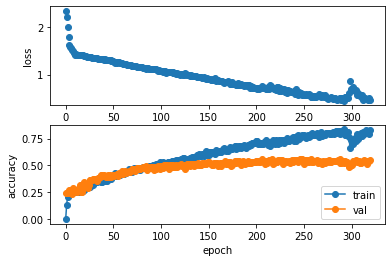

In [7]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_list, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_list, '-o')
plt.plot(solver.val_acc_list, '-o')
plt.legend(['train', 'val'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
print(np.max(solver.val_acc_list))

0.5620767494356659
